## 라이브러리

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import csv
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'NanumGothic'

## 파일 불러오기

In [3]:
Drama = ['Breaking Bad', 'Friends', 'Game of Thrones', 'Greys Anatomy', 'Modern Family', 'Sherlock', 'The Big Bang Theory', 'The Good Place']
Movie = ['Ben Platt Live From Radio City Music Hall', 'Inception', 'Klaus', 'Men In Black', 'Moneyball', 'Monty Python And The Holy Grail', 'The Boy In The Striped Pajamas', 'The Departed', 'The Intern', 'There Will Be Blood', 'Zootopia']

In [4]:
title = Movie[6] # 여기서 작품 선택

if title in Drama:
    path = '../Script/Drama'
    file_name = title.replace(' ', '.') + '.WEBRip.Netflix.en[cc]'
    # file_name = 'Ben.Platt.Live.from.Radio.City.Music.Hall.WEBRip.Netflix.en[cc]'
else:
    path = '../Script/Movie'
    file_name = 'unique_words_' + title.replace(' ', '.') + '.WEBRip.Netflix.en[cc]'
    # file_name = 'There.Will.Be.Blood.WEBRip.Netflix.en[cc]'

file = pd.read_csv(f'{path}/{title}/{file_name}.csv')

In [5]:
df_words_in_script = file
display(df_words_in_script.info(), df_words_in_script)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   732 non-null    object
 1   counts  732 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


None

,words,counts
0,bruno,44
1,well,30
2,one,24
3,know,22
4,go,20
...,...,...
727,mummy,1
728,music,1
729,musicians,1
730,national,1


In [6]:
# df_result = pd.DataFrame(columns=['Word', 'oxford_level', 'oxford_version', 'lexile_grade', 'lexile_category', 'toefl', 'tsl', 'bsl', 'ngsl_freq', 'ngsl_sp_freq', 'naver_level', 'lemmetized'])
df_result = pd.DataFrame(columns=['Word'])
df_result

,Word


In [7]:
df_result['Word'] = df_words_in_script['words']
df_result

,Word
0,bruno
1,well
2,one
3,know
4,go
...,...
727,mummy
728,music
729,musicians
730,national


## 단어 파일 불러와서 merge

### 한 파일 씩 할 때

In [8]:
# level = ['all_oxford', 'lexile_all_levels', 'ngsl_freq', 'ngsl_sp_freq']
# lemmas = ['awsl_with_lemmas', 'bsl_with_lemmas', 'ngsl_with_lemmas', 'tsl_with_lemmas']
# existence = ['toefl']
# file_name = existence[0]
# word_file = pd.read_csv(f'../words/{file_name}.csv')

In [9]:
# df_word = word_file
# display(df_word.info(), df_word)

In [10]:
# df_result = pd.merge(df_result, df_word, how='left', on='Word')
# df_result

### 전체 파일 처리할 때 
### 중복 컬럼이 있어서 파일 불러오고 merge할 때 컬럼 이름까지 수정

In [11]:
level = ['all_oxford', 'lexile_all_levels', 'ngsl_freq', 'ngsl_sp_freq']
lemmas = ['awsl_with_lemmas', 'bsl_with_lemmas', 'ngsl_with_lemmas', 'tsl_with_lemmas']
existence = ['toefl']

# Frequency 컬럼이 있는 파일 추가 시 수정 필요
for i in range(len(level)):
    file_name = level[i]
    word_file = pd.read_csv(f'../words/{file_name}.csv')
    df_word = word_file
    if i in [2, 3]:
        new_columns = ['', '', 'ngsl_freq', 'ngsl_sp_freq']
        df_word = df_word.rename(columns={'Frequency': new_columns[i]})
    df_result = pd.merge(df_result, df_word, how='left', on='Word')

# Lemmas 컬럼이 있는 파일 추가 시 수정 필요
for i in range(len(lemmas)):
    file_name = lemmas[i]
    word_file = pd.read_csv(f'../words/{file_name}.csv')
    df_word = word_file
    new_columns = ['awsl', 'bsl', 'ngsl', 'tsl']
    df_word = df_word.rename(columns={'Lemmas': new_columns[i]})
    df_result = pd.merge(df_result, df_word, how='left', on='Word')

# 현재 toefl 하나 뿐이어서 그대로 실행해도 되지만, 데이터 추가 시 수정 필요
for data in existence:
    file_name = data
    word_file = pd.read_csv(f'../words/{file_name}.csv')
    df_word = word_file
    df_word['toefl'] = True
    df_result = pd.merge(df_result, df_word, how='left', on='Word')

df_result = df_result.rename(columns={'Domain': 'lexile_category', 'Level': 'lexile_grade'})

df_result

,Word,oxford_level,oxford_version,lexile_category,lexile_grade,ngsl_freq,ngsl_sp_freq,awsl,bsl,ngsl,tsl,toefl
0,bruno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,well,A1,3000.0,NaN,NaN,A1,A1,unwell;;wellbeing;wellknown;wellness,NaN,wells;welled;welling,NaN,NaN
2,one,A1,3000.0,NaN,NaN,A1,A1,noone;oneness;oneself,NaN,ones,NaN,NaN
3,know,NaN,NaN,NaN,NaN,A1,A1,knowable;knowingly;unknowable;unknowing;unknow...,NaN,knows;knew;knowing;known,NaN,NaN
4,go,NaN,NaN,NaN,NaN,A1,A1,goer;goner,NaN,goes;went;going;gone;goin;gonna,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
727,mummy,NaN,NaN,social_studies,4.0,B1,B1,NaN,NaN,NaN,NaN,NaN
728,music,NaN,NaN,NaN,NaN,A1,A1,musical;musically;musician;musicianship,NaN,NaN,NaN,NaN
729,musicians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,national,A2,3000.0,NaN,NaN,A1,A1,NaN,NaN,nationals,NaN,NaN


## 컬럼 정리
Word | oxford_level | oxford_version | lexile_grade | lexile_category | toefl | tsl | bsl | ngsl_freq | ngsl_sp_freq | naver_level | lemmetized

In [12]:
df_result.head(10)

,Word,oxford_level,oxford_version,lexile_category,lexile_grade,ngsl_freq,ngsl_sp_freq,awsl,bsl,ngsl,tsl,toefl
0,bruno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,well,A1,3000.0,NaN,NaN,A1,A1,unwell;;wellbeing;wellknown;wellness,NaN,wells;welled;welling,NaN,NaN
2,one,A1,3000.0,NaN,NaN,A1,A1,noone;oneness;oneself,NaN,ones,NaN,NaN
3,know,NaN,NaN,NaN,NaN,A1,A1,knowable;knowingly;unknowable;unknowing;unknow...,NaN,knows;knew;knowing;known,NaN,NaN
4,go,NaN,NaN,NaN,NaN,A1,A1,goer;goner,NaN,goes;went;going;gone;goin;gonna,NaN,NaN
5,come,NaN,NaN,NaN,NaN,A1,A1,comer;incoming;oncoming,NaN,comes;came;coming;cometh,NaN,NaN
6,think,NaN,NaN,NaN,NaN,A1,A1,aforethought;afterthought;rethink;;thinker;tho...,NaN,thinks;thought;thinking;thoughts,NaN,NaN
7,like,NaN,NaN,NaN,NaN,A1,A1,dislike;;likeable;likeably,NaN,likes;liked;liking,NaN,NaN
8,yes,A1,3000.0,NaN,NaN,A1,A1,NaN,NaN,yeses,NaN,NaN
9,want,NaN,NaN,NaN,NaN,A1,A1,unwanted,NaN,wants;wanted;wanting;wanna,NaN,NaN


In [13]:

for column in df_result.columns:
    if column in ['Word', 'awsl', 'bsl', 'ngsl', 'tsl']: continue
    print(column, ':', df_result[column].unique())


oxford_level : [nan 'A1' 'A2' 'B1' 'B2' 'C1']
oxford_version : [  nan 3000. 5000.]
lexile_category : [nan 'social_studies' 'general' 'science' 'math']
lexile_grade : [nan  1.  2.  3.  5.  6.  4.  9.]
ngsl_freq : [nan 'A1' 'A2' 'B3' 'A4' 'B1' 'A3' 'B2' 'C1' 'C3' 'C2' 'C4']
ngsl_sp_freq : [nan 'A1' 'A2' 'B2' 'A4' 'B1' 'A3' 'B3' 'C2' 'C1' 'C3']
toefl : [nan True]


## 단어 형태 모음(-sl)들을 있다면 True 없다면 False로 변환

In [14]:
df_result['awsl'] = df_result['awsl'].notnull()
df_result['bsl'] = df_result['bsl'].notnull()
df_result['ngsl'] = df_result['ngsl'].notnull()
df_result['tsl'] = df_result['tsl'].notnull()
df_result['toefl'] = df_result['toefl'].notnull()
df_result.head(10)
# df_result['toefl'].value_counts()

,Word,oxford_level,oxford_version,lexile_category,lexile_grade,ngsl_freq,ngsl_sp_freq,awsl,bsl,ngsl,tsl,toefl
0,bruno,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
1,well,A1,3000.0,NaN,NaN,A1,A1,True,False,True,False,False
2,one,A1,3000.0,NaN,NaN,A1,A1,True,False,True,False,False
3,know,NaN,NaN,NaN,NaN,A1,A1,True,False,True,False,False
4,go,NaN,NaN,NaN,NaN,A1,A1,True,False,True,False,False
5,come,NaN,NaN,NaN,NaN,A1,A1,True,False,True,False,False
6,think,NaN,NaN,NaN,NaN,A1,A1,True,False,True,False,False
7,like,NaN,NaN,NaN,NaN,A1,A1,True,False,True,False,False
8,yes,A1,3000.0,NaN,NaN,A1,A1,False,False,True,False,False
9,want,NaN,NaN,NaN,NaN,A1,A1,True,False,True,False,False


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


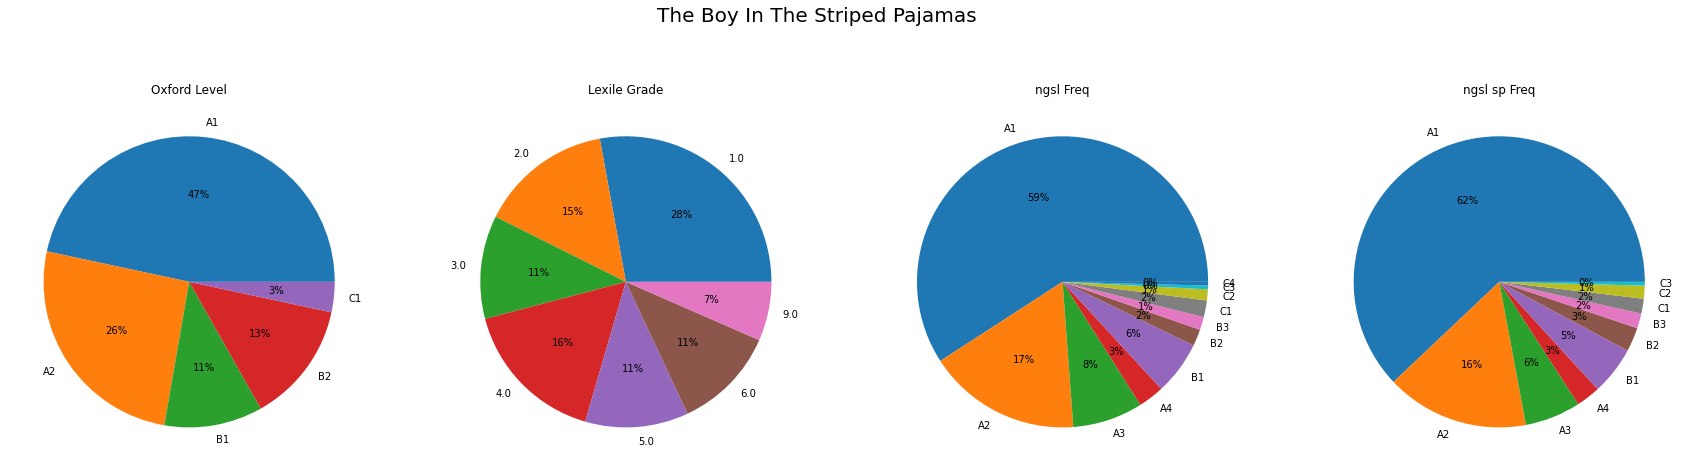

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(30, 8), facecolor='white')
fig.suptitle(title, fontsize=20)
result = df_result['oxford_level'].value_counts().sort_index()
axes[0].pie(result, labels=result.index, autopct = "%1.0f%%")
axes[0].set_title('Oxford Level')   

result = df_result['lexile_grade'].value_counts().sort_index()
axes[1].pie(result, labels=result.index,  autopct = "%1.0f%%")
axes[1].set_title('Lexile Grade')

result = df_result['ngsl_freq'].value_counts().sort_index()
axes[2].pie(result, labels=result.index,  autopct = "%1.0f%%")
axes[2].set_title('ngsl Freq')

result = df_result['ngsl_sp_freq'].value_counts().sort_index()
axes[3].pie(result, labels=result.index,  autopct = "%1.0f%%")
axes[3].set_title('ngsl sp Freq')

plt.show()

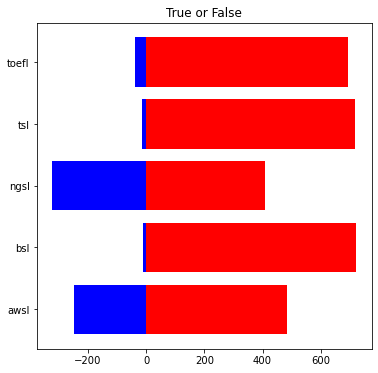

In [16]:
# awsl bsl ngsl tsl toefl
result = pd.DataFrame()
result['awsl'] = df_result['awsl'].value_counts()
result['bsl'] = df_result['bsl'].value_counts()
result['ngsl'] = df_result['ngsl'].value_counts()
result['tsl'] = df_result['tsl'].value_counts()
result['toefl'] = df_result['toefl'].value_counts()
# result

plt.figure(figsize = (6,6))
plt.barh(result.columns, -result.loc[True], color='b')
plt.barh(result.columns, result.loc[False], color='r')
plt.title('True or False')
plt.show()

In [17]:
df_graph = df_result.copy()
df_graph = df_graph.drop(columns=('Word'))
df_graph.head()


,oxford_level,oxford_version,lexile_category,lexile_grade,ngsl_freq,ngsl_sp_freq,awsl,bsl,ngsl,tsl,toefl
0,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
1,A1,3000.0,NaN,NaN,A1,A1,True,False,True,False,False
2,A1,3000.0,NaN,NaN,A1,A1,True,False,True,False,False
3,NaN,NaN,NaN,NaN,A1,A1,True,False,True,False,False
4,NaN,NaN,NaN,NaN,A1,A1,True,False,True,False,False


In [18]:
all_result = pd.DataFrame()
all_result['oxford_level'] = df_result['oxford_level'].notnull().value_counts()
all_result['oxford_version'] = df_result['oxford_version'].notnull().value_counts()
all_result['lexile_category'] = df_result['lexile_category'].notnull().value_counts()
all_result['lexile_grade'] = df_result['lexile_grade'].notnull().value_counts()
all_result['ngsl_freq'] = df_result['ngsl_freq'].notnull().value_counts()
all_result['ngsl_sp_freq'] = df_result['ngsl_sp_freq'].notnull().value_counts()
all_result['awsl'] = df_result['awsl'].value_counts()
all_result['bsl'] = df_result['bsl'].value_counts()
all_result['ngsl'] = df_result['ngsl'].value_counts()
all_result['tsl'] = df_result['tsl'].value_counts()
all_result['toefl'] = df_result['toefl'].value_counts()
all_result = all_result.sort_index(ascending=False)
all_result

# df_result['toefl'].value_counts()

,oxford_level,oxford_version,lexile_category,lexile_grade,ngsl_freq,ngsl_sp_freq,awsl,bsl,ngsl,tsl,toefl
True,238,238,61,61,487,485,249,10,324,13,39
False,494,494,671,671,245,247,483,722,408,719,693


In [19]:
all_result = all_result.transpose()
all_result

,True,False
oxford_level,238,494
oxford_version,238,494
lexile_category,61,671
lexile_grade,61,671
ngsl_freq,487,245
ngsl_sp_freq,485,247
awsl,249,483
bsl,10,722
ngsl,324,408
tsl,13,719


Text(0.5, 1.0, 'All Words Ratio')

<Figure size 360x216 with 0 Axes>

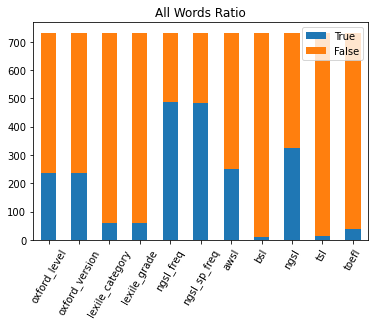

In [22]:
plt.figure(figsize=(5,3))
all_result.plot.bar(stacked=True, rot=60)
plt.title('All Words Ratio')
